In [18]:
# Importando Dados
import pandas as pd
import os

In [19]:
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..","data"))
data = pd.read_csv(os.path.join(data_path, "hotel.csv"))
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,0,0,59.850000,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,0,0,76.500000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,0,0,75.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,0,0,95.000000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,0,0,131.400000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,0,0,89.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,0,0,161.813582,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,0,0,100.212476,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,0,0,52.834141,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

In [21]:
# Modelo Preliminar
# Separação de Variáveis
X = data.drop(['booking_status'], axis=1)
y = data['booking_status']

In [22]:
# Importando a bibliote train test split
from sklearn.model_selection import train_test_split

In [23]:
# Separando as variáveis em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,random_state=50, test_size=0.3, stratify=y)

In [24]:
# Importando o modelo
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Instanciando o modelo
modelo = RandomForestClassifier(random_state=2)

In [26]:
# Aplicando o fit no modelo
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [27]:
# Precision
modelo.score(X_teste, y_teste)

0.920636470128856

In [28]:
# Verificando o balanceamento dos dados
data['booking_status'].value_counts(normalize=True)

0    0.5
1    0.5
Name: booking_status, dtype: float64

In [29]:
# Verificando os dados
import seaborn as sns

<Axes: xlabel='booking_status', ylabel='arrival_month'>

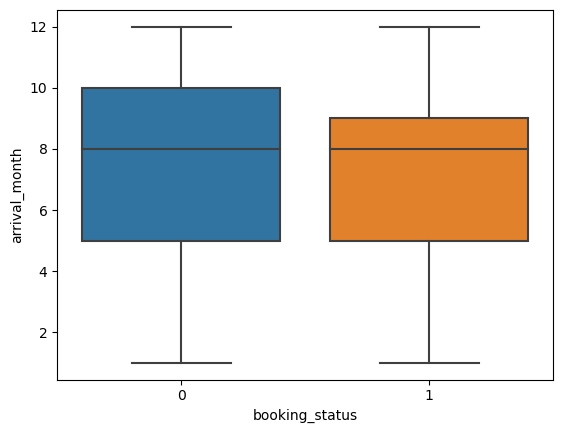

In [30]:
sns.boxplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

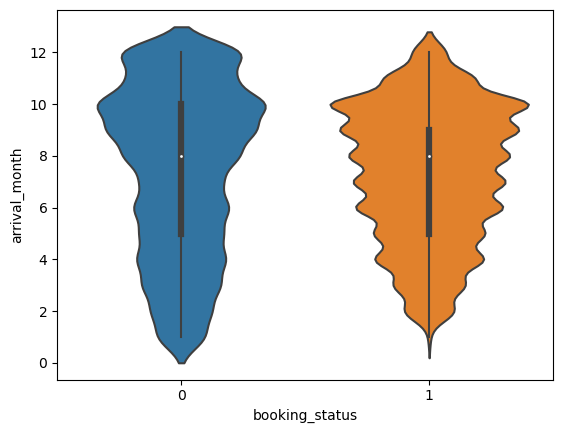

In [31]:
sns.violinplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

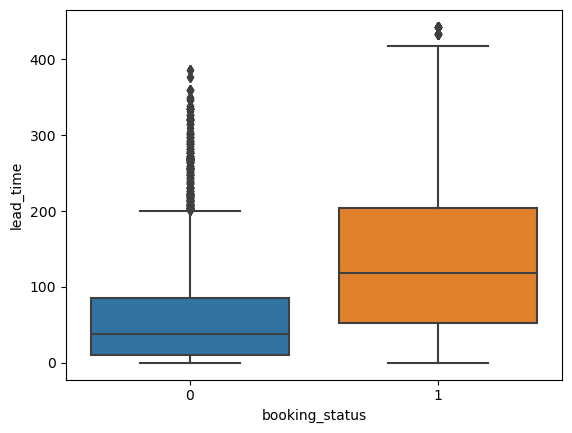

In [32]:
sns.boxplot(X_treino, x=y_treino, y='lead_time')

In [33]:
# Concatenar as tabelas
correlacao = pd.concat([X_treino, y_treino], axis=1).corr()

In [34]:
import matplotlib.pyplot as plt

<Axes: >

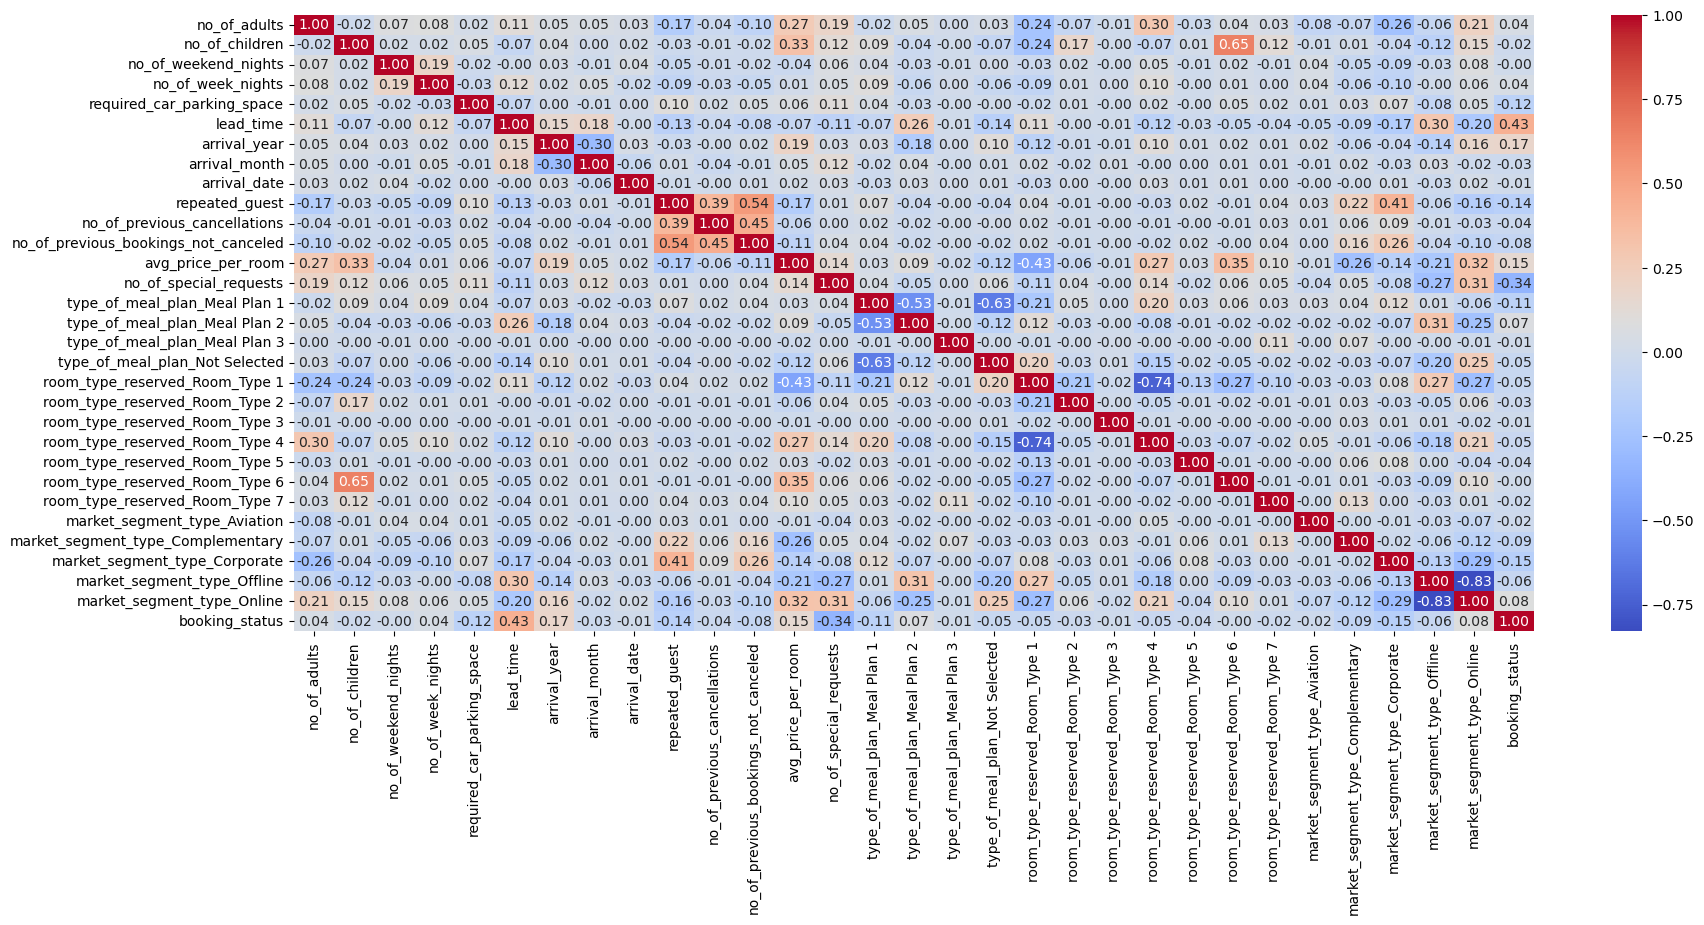

In [35]:
plt.figure(figsize=(20,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

In [36]:
modelo = RandomForestClassifier(random_state=2)

In [37]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [38]:
importancia = pd.DataFrame({'colunas': X_treino.columns, 'importancia':modelo.feature_importances_})
importancia

,colunas,importancia
0,no_of_adults,0.022453
1,no_of_children,0.005742
2,no_of_weekend_nights,0.031755
3,no_of_week_nights,0.047354
4,required_car_parking_space,0.008567
5,lead_time,0.283828
6,arrival_year,0.023609
7,arrival_month,0.085598
8,arrival_date,0.082394
9,repeated_guest,0.004197


In [39]:
importancia.sort_values(by='importancia', ascending=False)

,colunas,importancia
5,lead_time,0.283828
13,no_of_special_requests,0.137130
12,avg_price_per_room,0.137018
7,arrival_month,0.085598
8,arrival_date,0.082394
3,no_of_week_nights,0.047354
2,no_of_weekend_nights,0.031755
28,market_segment_type_Offline,0.029749
6,arrival_year,0.023609
29,market_segment_type_Online,0.022976


In [40]:
importancia10 = importancia.sort_values(by='importancia', ascending=False).head(10)

[Text(0, 0, 'lead_time'),
 Text(1, 0, 'no_of_special_requests'),
 Text(2, 0, 'avg_price_per_room'),
 Text(3, 0, 'arrival_month'),
 Text(4, 0, 'arrival_date'),
 Text(5, 0, 'no_of_week_nights'),
 Text(6, 0, 'no_of_weekend_nights'),
 Text(7, 0, 'market_segment_type_Offline'),
 Text(8, 0, 'arrival_year'),
 Text(9, 0, 'market_segment_type_Online')]

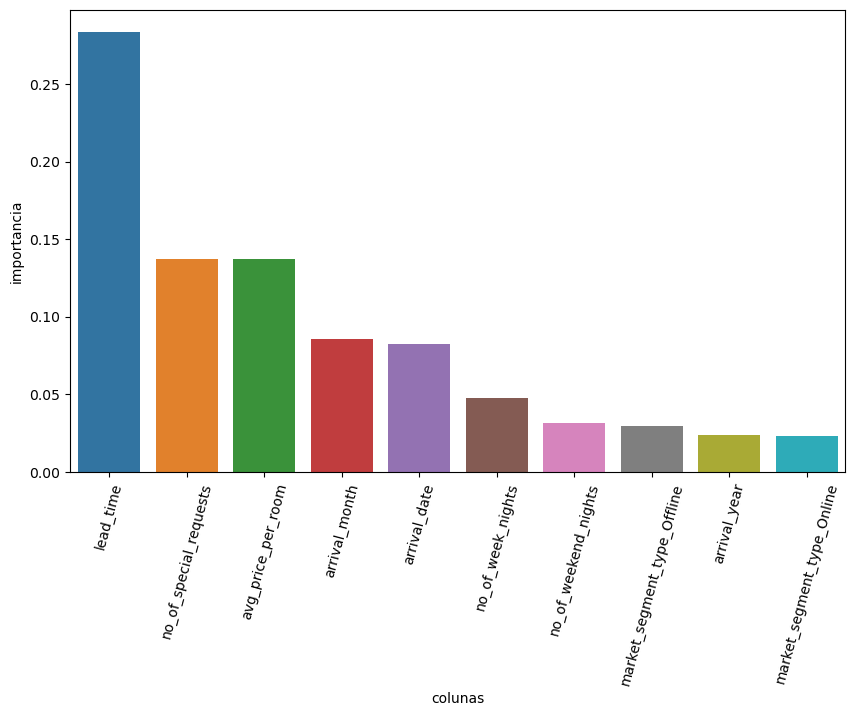

In [41]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='colunas', y='importancia', data=importancia10)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)

In [42]:
from sklearn.feature_selection import SelectFromModel

In [43]:
modelo_fselecionadas = SelectFromModel(modelo, max_features= 10, prefit = True)

In [44]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino)
X_teste_selecionado = modelo_fselecionadas.transform(X_teste)

c:\Users\ricka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ricka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [45]:
modelo = RandomForestClassifier(random_state=2)

In [46]:
modelo.fit(X_treino_selecionado, y_treino)

RandomForestClassifier(random_state=2)

In [47]:
modelo.score(X_teste_selecionado, y_teste)

0.8976962124170246

In [48]:
# Cross Validation
from sklearn.model_selection import GridSearchCV

In [49]:
modelo = RandomForestClassifier(random_state= 2)

In [51]:
parametros_busca = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

In [52]:
grid_search = GridSearchCV(estimator = modelo, param_grid=parametros_busca,
                            scoring='accuracy', cv=5, n_jobs=-1)

In [53]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [54]:
model_fselecionadas = SelectFromModel(grid_search.best_estimator_, max_features= 10, prefit=True)

In [55]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino)
X_teste_selecionado = modelo_fselecionadas.transform(X_teste)

c:\Users\ricka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ricka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [56]:
modelo = grid_search.best_estimator_

In [57]:
modelo.fit(X_treino_selecionado, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [58]:
modelo.score(X_teste_selecionado, y_teste)

0.8973057399453338

In [64]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [60]:
y_pred = modelo.predict(X_teste_selecionado)

In [61]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

Text(50.722222222222214, 0.5, 'Classe real')

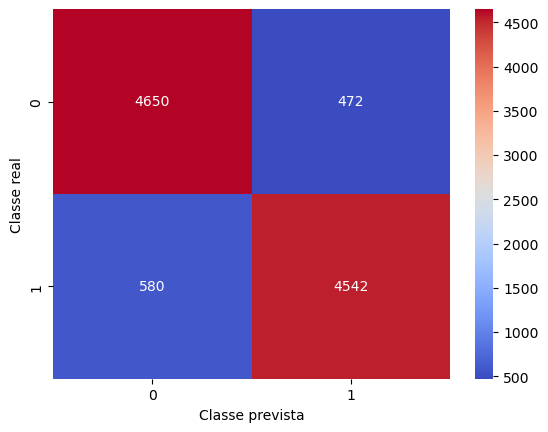

In [63]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt ='d')
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')

In [66]:
fpr, tpr, treshoulds = roc_curve(y_teste, y_pred)

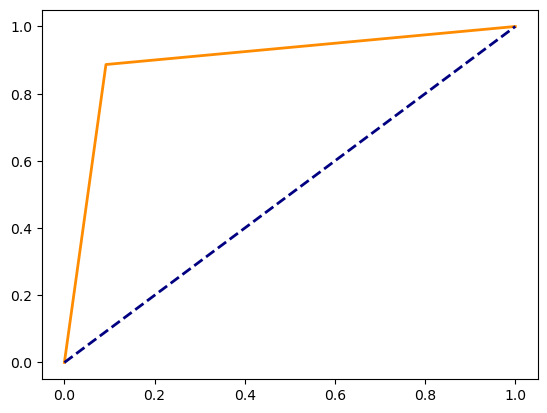

In [69]:
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

In [70]:
roc_auc=auc(fpr, tpr)
roc_auc

0.8973057399453339

In [71]:
# RFE
from sklearn.feature_selection import RFE

In [72]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [73]:
parametros = {'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state' : 2}

In [74]:
modelo = RandomForestClassifier(**parametros)

In [76]:
selecionador = RFE(modelo, n_features_to_select= 10, step=1)

In [77]:
selecionador.fit(X_treino, y_treino)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [78]:
X_treino_selecionado = selecionador.transform(X_treino)
X_teste_selecionado = selecionador.transform(X_teste)

In [79]:
modelo.fit(X_treino_selecionado, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [80]:
modelo.score(X_teste_selecionado, y_teste)

0.9126317844591956

In [81]:
y_pred = modelo.predict(X_teste_selecionado)

In [82]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

<Axes: >

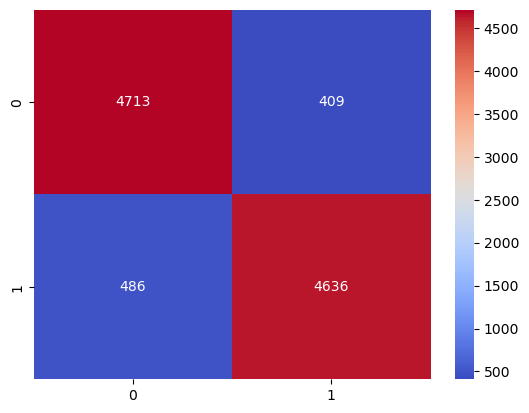

In [83]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')

In [85]:
# Validação cruzada concomitante a seleção das melhores features
modelo = RandomForestClassifier(**parametros)

In [86]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [87]:
cv = StratifiedKFold(5, shuffle=True, random_state=500)

In [88]:
rfecv = RFECV(
    estimator=modelo,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=1,
    importance_getter='auto'
)

In [89]:
rfecv.fit(X_treino, y_treino)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, random_state=2),
      scoring='roc_auc')

In [90]:
print(f'O número ideal de features é: {rfecv.n_features_}')

O número ideal de features é: 25


In [93]:
print(f'O ranking das features {rfecv.ranking_}')

O ranking das features [1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]


In [94]:
print(f'Score: {rfecv.cv_results_}')

Score: {'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.77913523, 0.88305492, 0.90862325, 0.94651964, 0.95776255,
       0.95994017, 0.96338291, 0.96326103, 0.96628728, 0.96

In [95]:
y_pred = rfecv.predict(X_teste)

In [96]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

<Axes: >

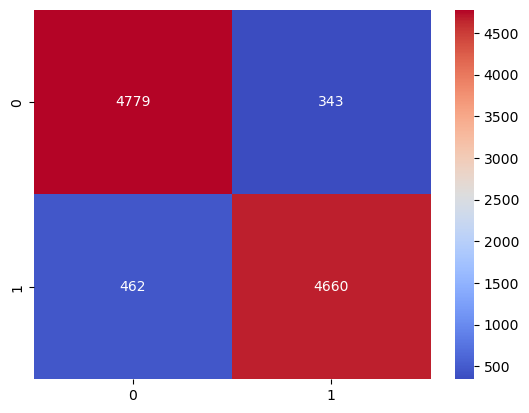

In [97]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')

In [98]:
resultado = rfecv.cv_results_

In [99]:
resultado['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

In [100]:
results_df = pd.DataFrame({'Valores': resultado['mean_test_score']})

<Axes: ylabel='Valores'>

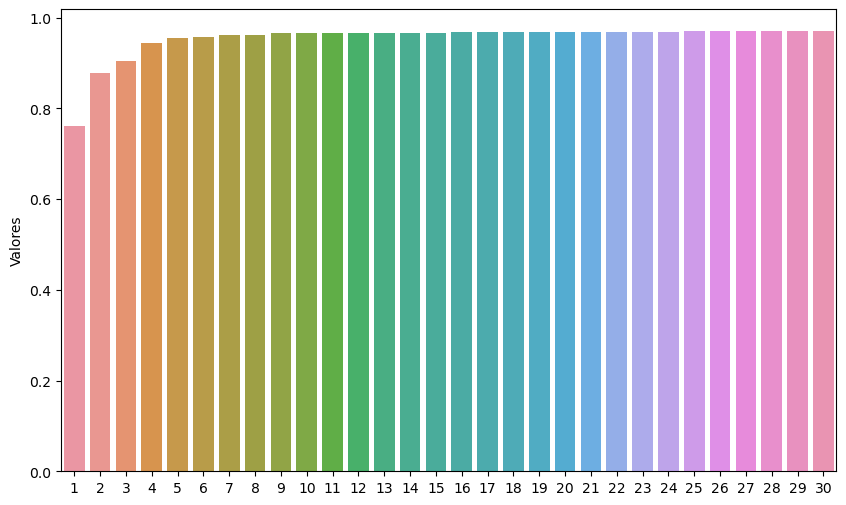

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index+1, y='Valores', data=results_df)